In [2]:
import cv2

In [3]:
#旧モデル
cascade = cv2.CascadeClassifier("../models/opencv-4.7.0/opencv-4.7.0/data/haarcascades/haarcascade_frontalface_default.xml")
face_recognizer = cv2.FaceRecognizerSF_create("../models/face_recognizer_fast.onnx", "")

In [4]:
img = cv2.imread("../image.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
lists = cascade.detectMultiScale(img_gray, minSize = (100, 100))

In [5]:
lists

array([[440, 191, 338, 338]], dtype=int32)

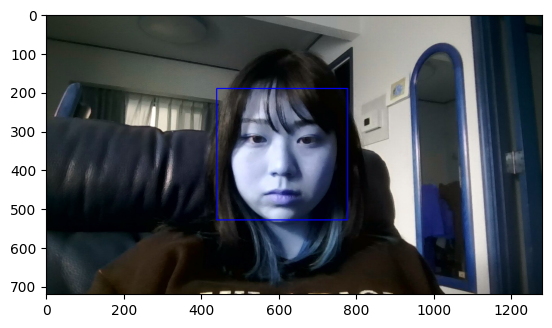

In [10]:
if len(lists):
    for (x,y,w,h) in lists:
        cv2.rectangle(img, (x,y), (x+w, y+h),(0, 0,255), thickness=2)
    #画像を表示する
    from matplotlib import pyplot as plt
    %matplotlib inline
    plt.imshow(img)
    plt.show()
else:
    print("Nothing")

In [6]:
#モデルを読み込む
#cv2.FaceDetectorYN_create("パス", "", サイズ)
face_detector = cv2.FaceDetectorYN_create("../models/yunet.onnx", "", (0, 0))
face_recognizer = cv2.FaceRecognizerSF_create("../models/face_recognizer_fast.onnx", "")

[ERROR:0@56.283] global onnx_importer.cpp:2629 parseShape DNN/ONNX(Shape): dynamic 'zero' shapes are not supported, input 243 [ 0 0 0 51 ]
[ERROR:0@56.291] global onnx_importer.cpp:1051 handleNode DNN/ONNX: ERROR during processing node with 1 inputs and 1 outputs: [Shape]:(onnx_node!Shape_70) from domain='ai.onnx'


error: OpenCV(4.7.0) /io/opencv/modules/dnn/src/onnx/onnx_importer.cpp:1073: error: (-2:Unspecified error) in function 'handleNode'
> Node [Shape@ai.onnx]:(onnx_node!Shape_70) parse error: OpenCV(4.7.0) /io/opencv/modules/dnn/src/onnx/onnx_importer.cpp:2630: error: (-215:Assertion failed) !isDynamicShape in function 'parseShape'
> 

In [5]:
#画像を入力する
#cv2.imread(パス)画像を読み込む
image = cv2.imread("../meruru.jpg")
height, width, _ = image.shape
#入力画像の大きさに合わせてサイズを設定
face_detector.setInputSize((width, height))

AttributeError: 'cv2.CascadeClassifier' object has no attribute 'setInputSize'

In [8]:
#画像を入力して顔を検出する
#モデル.detect(読み込んだ画像)
_, faces = face_detector.detect(image)
faces = faces if faces is not None else []

In [11]:
#検出した顔を切り抜く
aligned_faces = []
if lists is not None:
    for face in lists:
        #検出した画像と顔の特徴の検出結果を入力する
        aligned_face = face_recognizer.alignCrop(image,face)
        aligned_faces.append(aligned_face)

In [12]:
#顔画像を保存する
#enumerate()でインデックス値とリストの要素を付与させる
for i, aligned_face in enumerate(aligned_faces):
    cv2.imwrite("face{:03}.jpg".format(i+1), aligned_face)